# Exploring Global Weather Trends Project 1 

- By: Calvert Louden Jr.
- June18_Cohort Data Analyst Nano Degree enrollee

# Introduction

Welcome to my exploration of global weather trends! The purpose of this project is to compare average temperatures of a major local city near where I live to a dataset containing global weather trend averages. Being that I am travel fanatic, I thought it might be interesting to compare the 
average temperatures of 5 of my favorite cities to that of the global averages temperature dataset. I'm curious to see if, based on my 
geographical understanding of each city's climate, my assumptions about how they compare to one another will be supported by the datasets used for
my analysis. 

Within this report, I plan on making observations about the similarities and differences between world averages and the following cities I've
selected for analysis: 

Amsterdam, Netherlands | Barcelona, Spain | Kingston, Jamaica | Milan, Italy | Philadelphia, Pennsylvania.

I'll be answering the following questions along the way:

1.) At first glance, are there any trends that you notice visually within the data?

2.) Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?

3.) How do the changes in your city's temperatures over time compare to the changes in the global average? What about the moving average?

4.) What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

5.) Does my analysis and exploration of the supporting datasets support or dispute my assumptions when comparing cities to one another?

6.) What's the correlation coefficient for your selected cities?

In the sections to come, I will conduct my analysis and investigation of global weather trends using the datasets provided for this project. I willdiscuss further, the methods I used to gather and analyze the data, preparing it for visualization. In the analysis section, we will review and 
answer the questions above, supported with visualizations of course. The results will be a brief summary and interpretation of my charted datasets.And lastly, the conclusion will sum up the report, highlighting important or noticeable trends within the data. Let's get after it!

In [1]:
# For data analysis
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline



# Data Section:

The datasets used for my investigation were provided by the Udacity team. I was given three '.csv' files, city_list, city_data and global_data. 
The 'city_list' dataset contains the names and countries of major cities around the globe. The 'city_data' dataset contains average temperature 
values, years(1743 AD - 2013 AD), city name, and country name for specified cities around the globe. And lastly, the 'global_data' dataset contains information regarding average temperature values for years 1743 A.D. through 2015 A.D.

In [2]:
# Setting my DataFrames using my csv files: First I'll create a variable for the file path of each csv file then pass it to the .read_csv method in Pandas

# Creating the variables for the csv file paths
city_data_fp = '/Volumes/LACIE SETUP/Data_Science/Udacity_DataAnalyst_NanoDegree_Projects/city_data_P1-WT.csv'

global_data_fp = '/Volumes/LACIE SETUP/Data_Science/Udacity_DataAnalyst_NanoDegree_Projects/global_data_P1-WT.csv'

# Initializing my dataframes using the .read_csv method in Pandas
city_data_df = pd.read_csv(city_data_fp)

global_data_df = pd.read_csv(global_data_fp)

In [3]:
# Quick preview of our city_data dataframe
city_data_df.head()

,year,city,country,avg_temp_deg,10 - Year MA,25 - Year MA
0,1743,Amsterdam,Netherlands,45.374,NaN,NaN
1,1744,Amsterdam,Netherlands,50.558,NaN,NaN
2,1745,Amsterdam,Netherlands,37.508,NaN,NaN
3,1746,Amsterdam,Netherlands,NaN,NaN,NaN
4,1747,Amsterdam,Netherlands,NaN,NaN,NaN


In [4]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 6 columns):
year            1274 non-null int64
city            1274 non-null object
country         1274 non-null object
avg_temp_deg    1258 non-null float64
10 - Year MA    1264 non-null float64
25 - Year MA    1249 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 59.8+ KB


In [5]:
# Quick preview of our global_data dataframe
# On a side note, I noticed that the global data only started from year 1750, 7 years later than the city data.  In order to keep the datasets' 'Year' 
# column similar, I added years 1743-1749 to the global_data dataset with Null values. 
global_data_df.head()

,gbl_year,gat_cel,gbl_avg_temp,10 - Year gbl_MA,25 - Year gbl_MA
0,1743,NaN,NaN,NaN,NaN
1,1744,NaN,NaN,NaN,NaN
2,1745,NaN,NaN,NaN,NaN
3,1746,NaN,NaN,NaN,NaN
4,1747,NaN,NaN,NaN,NaN


In [6]:
global_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 5 columns):
gbl_year            273 non-null int64
gat_cel             266 non-null float64
gbl_avg_temp        266 non-null float64
10 - Year gbl_MA    263 non-null float64
25 - Year gbl_MA    248 non-null float64
dtypes: float64(4), int64(1)
memory usage: 10.7 KB


# Methods Section:

In order to properly analyze and investigate the provided dataset, I needed to manipulate it a bit in order to meet the specifications needed to 
conduct my analysis. Let's take a look at what I did: 

First things first, I needed to query the provided database for specified values. In order to do this, I used SQL to select the cities I was 
interested in exploring in the 'city_list' and 'city_data' datasets. Once selected, I exported the filtered datasets and saved them as '.csv' 
files. Once saved, I utilized my preferred Integrated Development Environment(IDE), IntelliJ IDEA's Jupyter Notebook GUI to conduct my analysis.  

Using a few Python libraries, Numpy, Pandas, Matplotlib and Seaborn to be exact, I was able to wrangle and manipulate the datasets in a way that 
would make exploration a bit less cumbersome, since I am new to programming in Python,... shucks, I'm new to programming in general. To start my 
analysis, I first needed to set my DataFrames using my csv files: I created a variable for the file path of each csv file then passed it to the 
'.read_csv' method in Pandas. This will create a dataframe object from the specified csv file and store it in a variable. From there, I ran the
'.info()' method on both newly created dataframes (city_data_df and global_data_df) to get a high level glance at the datasets' data types, column
names, row count, etc. I also ran the '.head()' method to ensure my dataframes were properly formatted the way I wanted. 

I've noticed that the way I have prepared my data set (city_data_df) for exploration may make it a bit difficult for me to append the global 
temperature data to each selected city dataset for comparison. My city_data_df contains data for all the cities I've selected, amassing over 1250
rows/entries. The issue I have is that the global_data_df dataset only has 271 rows/entries which coincides with the number of years from 1743 to 
2015, the length of time the global average temperature data spans. In order to compare each city's average temperatures with the global data
I'll need to append the global dataset to each city's data.  Im not that skilled in Python yet, so I took an easier approach than splicing and
indicing the city_data_df.  I chose instead, to create a view of the city_data_df, containing just the values for each specified city; I then 
stored that view of the dataframe in a variable with a corresponding city name, initializing my city dataframes. I was able to accomplish this by 
calling the '.loc[]' method on the 'city' column of the city_data_df and setting it equal to each city name. 

Once my city dataframes were initialized, I could now append the global_data_df (global dataset) to each of them, creating what I called a global
weather trend dataframe for each city (city-abbrv_gwt_df). I was successfully able to combine the amster_df with the global_data_df using 
Pandas '.concat()' method, however subsequent attempts for the remaining cities produced null values within the resulting dataframe which is not 
what I wanted. After some research, I realized I needed to reset the indexes of the remaining city dataframes I created.  Once I did that, the 
concatenation with global_data_df worked like a charm for the remaining cities.  Now we're ready to plot!

In [7]:
# Syntax to verify every unique value (city name) in the city_data dataframe
city_data_df['city'].unique().tolist()

['Amsterdam', 'Barcelona', 'Kingston', 'Milan', 'Philadelphia']

In [8]:
# Now that I've confirmed all the unique city names in the city_data dataframe, I going to create 5 separate dataframe objects for each city.  This will make 
# analyzing and plotting the dataset vs the global data easier to manage.

# Initializing my city dataframes
amster_df = city_data_df.loc[city_data_df.city == 'Amsterdam']
barca_df = city_data_df.loc[city_data_df.city == 'Barcelona']
king_df = city_data_df.loc[city_data_df.city == 'Kingston']
mila_df = city_data_df.loc[city_data_df.city == 'Milan']
phila_df = city_data_df.loc[city_data_df.city == 'Philadelphia']

In [9]:
# Appending the global average temperature dataset to each city dataframe I've created:

# Creating a Amsterdam, Netherlands global weather trends (gwt) dataset
amster_gwt_df = pd.concat([amster_df,global_data_df],axis=1)

In [10]:
# Resetting index
barca_ind_df = barca_df.reset_index(drop=True)
king_ind_df = king_df.reset_index(drop=True)
mila_ind_df = mila_df.reset_index(drop=True)
phila_ind_df = phila_df.reset_index(drop=True)
global_ind_data_df = global_data_df.reset_index(drop=True)

# Creating a Barcelona, Spain global weather trends (gwt) dataset
barca_gwt_df = pd.concat([barca_ind_df,global_ind_data_df],axis=1)

# Creating a Kingston, Jamaica global weather trends (gwt) dataset
king_gwt_df = pd.concat([king_ind_df,global_ind_data_df],axis=1)

# Creating a Milan, Italy global weather trends (gwt) dataset
mila_gwt_df = pd.concat([mila_ind_df,global_ind_data_df],axis=1)

# Creating a Philadelphia, Pennsylvania global weather trends (gwt) dataset
phila_gwt_df = pd.concat([phila_ind_df,global_ind_data_df],axis=1)

# Exploring my datasets a bit further...

Ok, now let's try and take a little deeper dive into the data to see if we can calculate the correlation coefficient for my selected cities and the global data dataset. The following section will explain my approach to preparing the data for 
analysis. 

- Now that I've completed some baseline analysis, let's go ahead and dive a little deeper into the data to see if we can calculate the correlation coefficients for my selected cities and the global data dataset. In order to do so I'll need to take a closer look at the yearly average
temperature changes of the cities I've selected as well as the global average temperature data, and not just its absolute value. Let's go ahead and use Pandas to retrieve the yearly average temperature changes, displayed as a percentage, for the for all our cities and global datasets.

In [11]:
# In order to explore the correlation coefficient below, I'll need to use my city dataframes and append the percent change in temperature 
# column to the dataframe. Before I do that however, I'll need to create new dataframe objects so that I don't rewrite the existing 
# city dataframe objects.

# Initializing my percent change dataframes to use later in a list:

# Creating my Amsterdam dataframe
amster_pct_chg_df = pd.DataFrame(amster_df)

# Creating my Barcelona dataframe
barca_pct_chg_df = pd.DataFrame(barca_ind_df)

# Creating my Kingston dataframe
king_pct_chg_df = pd.DataFrame(king_ind_df)

# Creating my Milan dataframe
mila_pct_chg_df = pd.DataFrame(mila_ind_df)

# Creating my Philadelphia dataframe
phila_pct_chg_df = pd.DataFrame(phila_ind_df)

# Creating my Global data dataframe
global_pct_chg_df = pd.DataFrame(global_ind_data_df)

# Creating a list of the percent change dataframes I'll use for my analysis
city_list = [amster_pct_chg_df,barca_pct_chg_df,king_pct_chg_df,mila_pct_chg_df,phila_pct_chg_df]

# We'll use Pandas' '.pct_change()' method to find the percent change for each year by making a new column, 'pct_chg_yrly'
# Since I've created a list of the dataframes I'll use for my analysis, I'll use a for loop to cycle through the city_list, and create a 
# column in each dataset named 'pct_chg_yrly'
for dataset in city_list:
    column_name = 'pct_chg_yrly'
    dataset[column_name] = dataset['avg_temp_deg'].pct_change()

In [12]:
# I have to run this script separately for global_data_df because it's average temperature column is not named 'avg_temp_deg' like the 
# others in the city_list; it's named 'gbl_avg_temp, so I wouldn't be able to put this dataframe within the city_list above, 
# which would be manipulated by the for loop. 
global_pct_chg_df['pct_chg_yrly'] = global_pct_chg_df['gbl_avg_temp'].pct_change()

In [13]:
# Taking a quick peak to see and ensure that the yearly pct change in temperature column was added as well as the values to all my 
# dataframes. I've checked them all but will only display a view of one here.
phila_pct_chg_df.head()

,year,city,country,avg_temp_deg,10 - Year MA,25 - Year MA,pct_chg_yrly
0,1743,Philadelphia,United States,42.926,45.995818,46.051077,NaN
1,1744,Philadelphia,United States,56.732,46.977636,46.458154,0.321623
2,1745,Philadelphia,United States,39.128,46.426182,46.180538,-0.310301
3,1746,Philadelphia,United States,NaN,46.401800,46.223600,NaN
4,1747,Philadelphia,United States,NaN,46.322000,46.234250,NaN


Great! Now what if I wanted to analyze the percent change in average temperature per year for all the dataframes in our city_list? Let's go ahead 
and build a DataFrame with all the ['pct_chg_yrly'] columns for each of the city_list dataframes.

In [14]:
comp_pct_chg_df = pd.concat([amster_pct_chg_df[column_name], barca_pct_chg_df[column_name], 
                             king_pct_chg_df[column_name], mila_pct_chg_df[column_name], phila_pct_chg_df[column_name], 
                             global_pct_chg_df[column_name]],axis=1,keys=['Amsterdam','Barcelona','Kingston','Milan',
                                                                          'Philadelphia','Global'])

# Let's take a quick look to ensure my dataframe is set the way I like. I've perused the whole dataframe to confirm it is what I want
# but will only show a splice here.
comp_pct_chg_df.head(25)

,Amsterdam,Barcelona,Kingston,Milan,Philadelphia,Global
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.114250,0.100355,-0.001124,0.230465,0.321623,NaN
2,-0.258119,-0.178377,0.000675,-0.307926,-0.310301,NaN
3,NaN,NaN,0.011247,NaN,NaN,NaN
4,NaN,NaN,-0.005338,NaN,NaN,NaN
5,NaN,NaN,-0.015877,NaN,NaN,NaN
6,NaN,NaN,0.015679,NaN,NaN,NaN
7,0.334969,0.200996,-0.021030,0.408180,0.386424,NaN
8,-0.014739,0.007581,-0.011427,0.010282,0.022895,-0.027927
9,-0.133539,-0.106778,-0.589027,-0.200409,-0.240368,-0.085411


Oops, looks like I forgot to include the year column. I'll append it to the comp_pct_chg_df.

In [15]:
comp_pct_chg_df = pd.concat([amster_df['year'],comp_pct_chg_df],axis=1)

In [16]:
# Taking a quick peak to make sure it worked. 
comp_pct_chg_df.head(25)

,year,Amsterdam,Barcelona,Kingston,Milan,Philadelphia,Global
0,1743.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1744.0,0.114250,0.100355,-0.001124,0.230465,0.321623,NaN
2,1745.0,-0.258119,-0.178377,0.000675,-0.307926,-0.310301,NaN
3,1746.0,NaN,NaN,0.011247,NaN,NaN,NaN
4,1747.0,NaN,NaN,-0.005338,NaN,NaN,NaN
5,1748.0,NaN,NaN,-0.015877,NaN,NaN,NaN
6,1749.0,NaN,NaN,0.015679,NaN,NaN,NaN
7,1750.0,0.334969,0.200996,-0.021030,0.408180,0.386424,NaN
8,1751.0,-0.014739,0.007581,-0.011427,0.010282,0.022895,-0.027927
9,1752.0,-0.133539,-0.106778,-0.589027,-0.200409,-0.240368,-0.085411


It looks like we're set! Now we can compare the average yearly percentage change in temperature of two cities to check how correlated they are. Wait,
hold on a sec. It looks like my year column data type is set as a float; I also want the year column to be my index. I'll go ahead and change the 
data type for the year column first, then set it as my index for the comp_pct_chg_df. Once I do that, then I can proceed and move on to the Data 
Analysis and Results section where I'll be plotting my analyses and discussing the results. 

In [17]:
# Changing the datatype for my year column to a string data type since I'll eventually be setting it as my index
comp_pct_chg_df['year'] = comp_pct_chg_df.astype({'year': str})

# Checking to make sure it worked
comp_pct_chg_df.dtypes

year             object
Amsterdam       float64
Barcelona       float64
Kingston        float64
Milan           float64
Philadelphia    float64
Global          float64
dtype: object

Awesome! Now let's set the year column as our index in comp_pct_chg_df

In [18]:
# Setting the year column as my index for the dataframe
comp_pct_chg_df.set_index('year').head()

,Amsterdam,Barcelona,Kingston,Milan,Philadelphia,Global
year,,,,,,
1743.0,NaN,NaN,NaN,NaN,NaN,NaN
1744.0,0.114250,0.100355,-0.001124,0.230465,0.321623,NaN
1745.0,-0.258119,-0.178377,0.000675,-0.307926,-0.310301,NaN
1746.0,NaN,NaN,0.011247,NaN,NaN,NaN
1747.0,NaN,NaN,-0.005338,NaN,NaN,NaN


# Data Analysis & Results Section:

Let's take a gander at the data, shall we? Here I'll use Python to create data visualizations (as best I can) to analyze the datasets I've just 
prepared. I'll use the data to answer the questions I've defined above in the introduction.

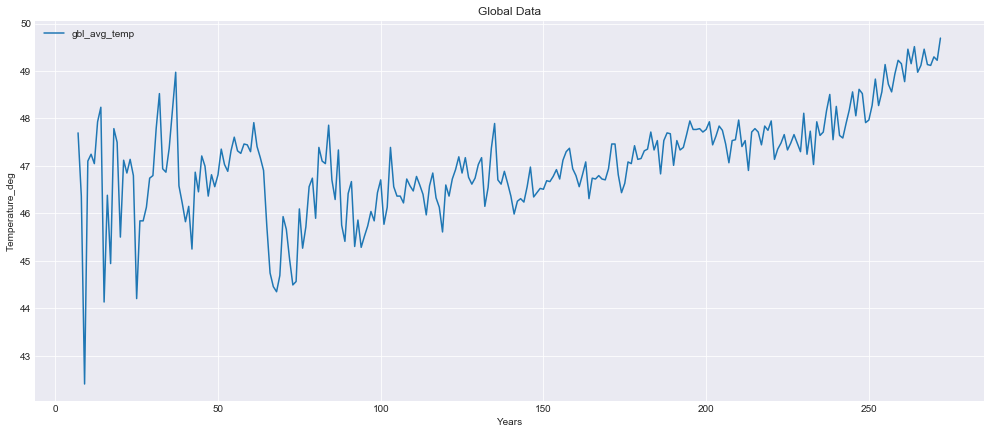

In [19]:
# Let's see a historical view of the global_data
plt.xlabel('Years')
plt.ylabel('Temperature_deg')
plt.title('Global Data')

global_data_df['gbl_avg_temp'].plot(legend=True,figsize=(17,7))

Here we can see an overall steady climb in the global average temperature dataset, with a rocky start  in the early years having quite 
the fluctuation and variance between data points. I wonder what that could be attributed to? 

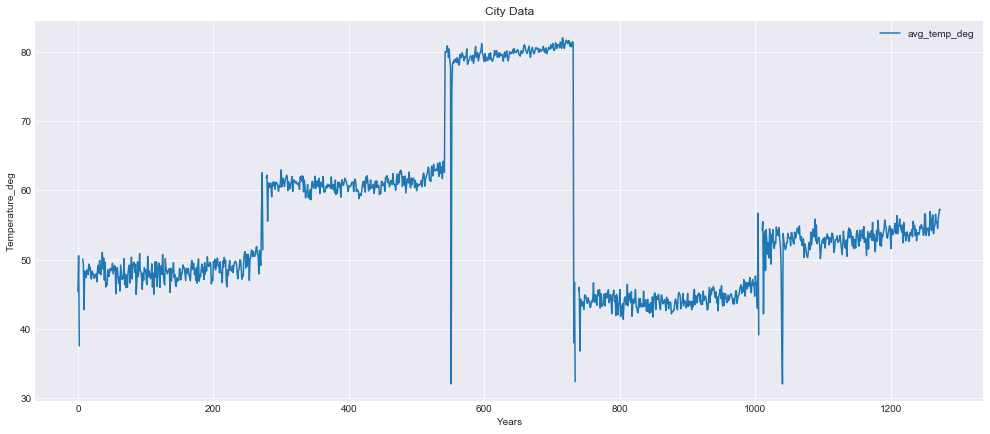

In [20]:
# Let's see a historical view of the city_data
plt.xlabel('Years')
plt.ylabel('Temperature_deg')
plt.title('City Data')

city_data_df['avg_temp_deg'].plot(legend=True,figsize=(17,7))

What's interesting to see here is that this visualization of the 'city_data' is vastly different, at first glance, to the historical 
visualization of the global data.  At first I thought that I had done something wrong, but then I realized that my 'city_data' dataset
includes 5 cities, not just the major city closest to where I live.  

Here you will notice a 'leveling out' of the data "so to speak" at 5 intervals within the plot, represeting the average temperature for a 
particular city over a period of time. From what I see here, I'm going to assume that the data points around the 80 degree temperature 
mark are probably Kingston, Jamaica being that it's located in the Carribean, a much warmer climate in general than the other 4 cities 
I've selected. 

Text(0.5,1,'City Data')

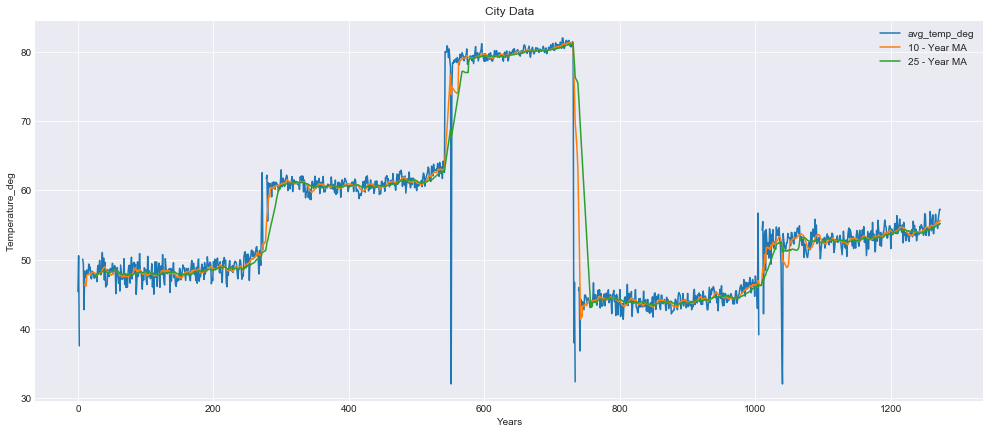

In [21]:
# Here's a high level glance at the avg temp in degrees for each city, compared to the 10 and 25 year moving averages for temperature within those same
# cities.

city_data_df[['avg_temp_deg','10 - Year MA','25 - Year MA']].plot(subplots=False,figsize=(17,7))

plt.xlabel('Years')
plt.ylabel('Temperature_deg')
plt.title('City Data')

As expected, we can see here that the average temperature for each city has a visible and definite correlation with the moving averages for 
10 years and 25 years. This is an obvious correlation being that the moving averages were calculated with the average tempeartures from those 
cities, over a specified number of years. 

Let's take a look at the global weather trends dataframes I created so we can find some similarities and differences. 

- Amsterdam, Netherlands

Text(0.5,1,'Amsterdam Global Weather Trends')

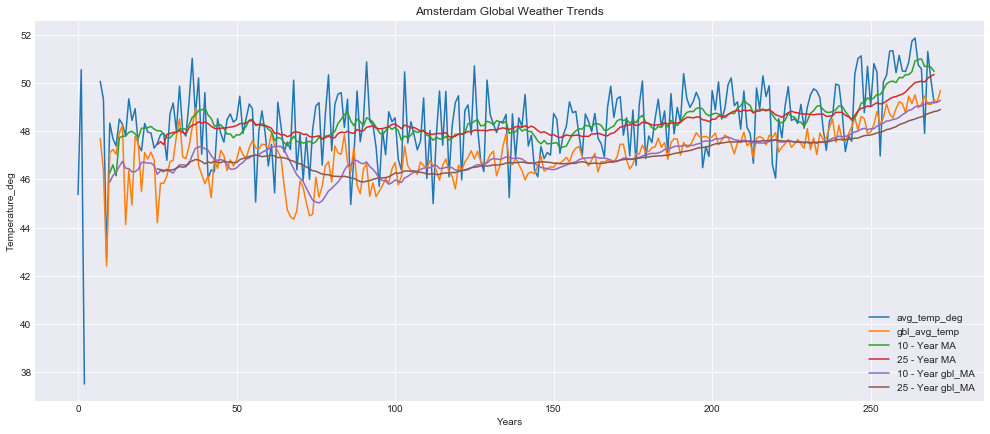

In [22]:
amster_gwt_df[['avg_temp_deg','gbl_avg_temp','10 - Year MA','25 - Year MA','10 - Year gbl_MA','25 - Year gbl_MA']].plot(subplots=False,figsize=(17,7))

# Setting my labels and title
plt.xlabel('Years')
plt.ylabel('Temperature_deg')
plt.title('Amsterdam Global Weather Trends')

Amsterdam's average temperature looks like it ranges mainly between 45-52 degrees. Based on the above visualization Amsterdam's average temperature is slightly hotter than the average global temperature and this variance seems to be pretty consistent over time, or in this case years 
(1743-2015).
 
Amsterdam's change in temperature over time seems to coincide with the global changes, peaking and falling on or near similar years within the 
dataset. What is also interesting is that the calculated moving averages for both Amsterdam and the global data also maintain a similar variance
in temperature that remains pretty consistent over time. 

This visualization, for me, strongly confirms the overall trend that Amsterdam's average temperature is very close to the global average 
temperature, and this is quite consistent over time, as the data shows. It's hard to say whether or not this data is proof the globe's average
temperature is getting hotter, but there is a steady, gradual growth in average temperature, but not by much over the 270-odd years the data
spans.

My assumptions about where Amsterdam's average temperature compared to the global data was not supported fully by the data.  I thought Amsterdam's
average temperature would be a bit higher than the global average, maybe ranging around 60 degrees, as that was my experience on both occassions 
that I visited. However, the data has shown me that Amsterdam's average temperature is much lower than I had assumed and closer to the global 
average than I had imagined. 

- Barcelona, Spain

Text(0.5,1,'Barcelona Global Weather Trends')

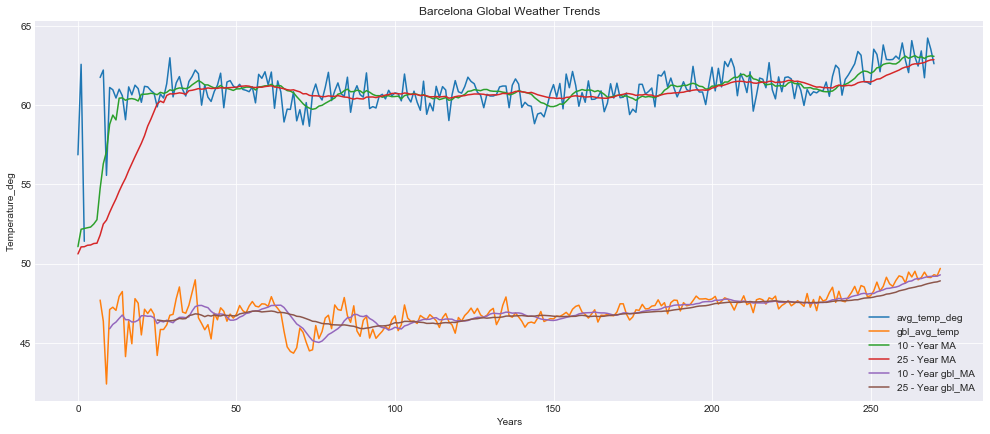

In [23]:
barca_gwt_df[['avg_temp_deg','gbl_avg_temp','10 - Year MA','25 - Year MA','10 - Year gbl_MA','25 - Year gbl_MA']].plot(subplots=False,figsize=(17,7))

# Setting my labels and title
plt.xlabel('Years')
plt.ylabel('Temperature_deg')
plt.title('Barcelona Global Weather Trends')

Now let's review my favorite city in the world, Barcelona, Spain.  This visualization seems to convey that Barcelona's average temperature is 
consistently hotter than the global average by about 15 degrees, give or take. 

With regards to changes in temperature over time in Barcelona vs. the global data, it seems as though there may be a correlation here as well.  
There are similar peaks and falls in the data points, however, the global data's fluctuation in temperature over time seems to lessen, where as 
Barcelona's variance in average temperature seems to fluctuate around 5 plus degrees. As for the moving averages, compared to average temperatures
for both Barcelona and the global data, there is an obvious correlation. When comparing Barcelona's moving average to the global data's moving
average, we can see that the variance that exists, remains pretty constant over time, and the length of the dataset.

The overall trend of this data shows both Barcelona and the global average temperatures slowly increasing over the past couple hundered years. 
The world's average temperature may be slightly increasing, but not by much.

Has this visualization supported or disputed my assumptions about this city compared to the other cities I've selected. Partially. I say this 
because, of the multiple occassions that I've visited Barcelona, for the most part it's been relatively warm. Warmer than Amsterdam for sure, but
certainly not compared to Kingston, Jamaica, which is to be expected. Based on the average temperature outliers for each city, I can see that 
Barcelona's average is hotter than Amsterdam's but cooler than Kingston's. 

- Kingston, Jamaica

Text(0.5,1,'Kingston Global Weather Trends')

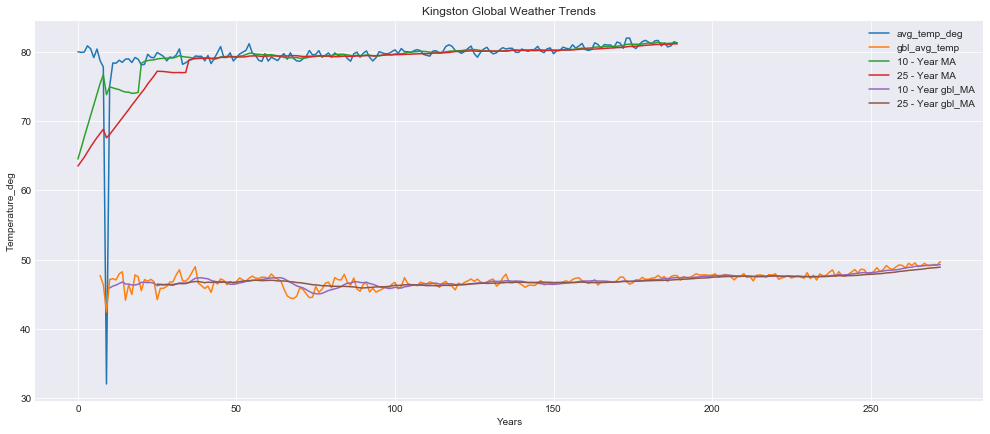

In [24]:
king_gwt_df[['avg_temp_deg','gbl_avg_temp','10 - Year MA','25 - Year MA','10 - Year gbl_MA','25 - Year gbl_MA']].plot(subplots=False,figsize=(17,7))

# Setting my labels and title
plt.xlabel('Years')
plt.ylabel('Temperature_deg')
plt.title('Kingston Global Weather Trends')

Kingston, Jamaica holds a dear place in my heart, as it is the capital of the country of my heritage. My family is from JA and I have many 
relatives that still reside there so whenever I go home to visit, I'll either fly into Montego Bay or Kingston, JA.  I am quite familiar with the
weather here, and from my earlier plot of the city_data dataframe, I was able to assume and now confirm that the data points near or around the 
80 degree mark do belong to the Kingston, JA dataset. 

Kingston's average temperature is progressively hotter than the global average temperature and has consistently been so for the span of the 
dataset. What's also interesting to note here is that the change in temperature over time for both Kingston and the global data seem to be similar
as well, with very little fluctuation. Even the moving averages for both Kingston and the global dataset are almost linear in nature as time 
progresses! I have to admit, I have no idea what that could be related to.

The overall trend of this visualization seems to be that variance between Kingston's average temperature and the global average temperature is 
extremely consistent over time. 

Are my assumptions about Kingston compared to other cities and the global dataset supported by this visualization? I would have to say yes. I was
able to correctly assume that the historical plot of the city_data dataset's plot points hovering around 80 degrees were indeed Kingston's data. 
Not only that, but I assumed that Kingston would have the highest average temperature out of all the cities I've selected which is also true. I 
did not however, anticipate Kingston's moving averages to be so linear when compared to one another. 

- Milan, Italy

Text(0.5,1,'Milan Global Weather Trends')

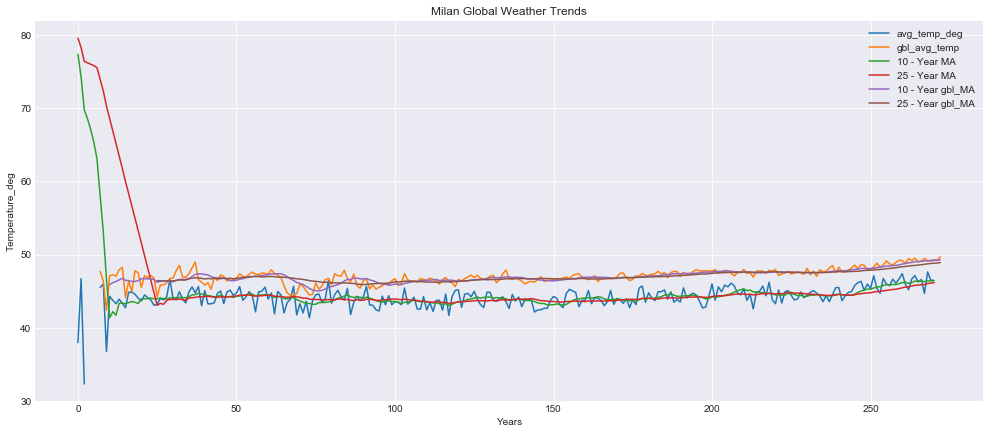

In [25]:
mila_gwt_df[['avg_temp_deg','gbl_avg_temp','10 - Year MA','25 - Year MA','10 - Year gbl_MA','25 - Year gbl_MA']].plot(subplots=False,figsize=(17,7))

# Setting my labels and title
plt.xlabel('Years')
plt.ylabel('Temperature_deg')
plt.title('Milan Global Weather Trends')

Whoa, this is interesting... It looks as though the average temperature for Milan, Italy is actually less(cooler) than the global average and the 
data visualization shows this as a pretty consistent trend over the past couple hundred years. 

The changes in temperature for Milan over a period of time seems to fluctuate more (has a higher variance) than the changes in temperature for the
global dataset. However, when comparing the moving averages, for either Milan, or the global dataset, it is clear to see that there is a direct 
correlation. Even the comparison between Milan's moving averages versus the global moving averages, yields a pretty consistent variance over the 
length(in years) of the dataset.

The overall trend here for the last few hundred years shows a slight increase in average temperature for both Milan and the global data. 

As far as my assumptions are concerned,... I was way off. I did not expect to see Milan's average temperature to be less(cooler) than the globe's
average temperature. That was totally unexpected. I did however, expect that Milan's average temperature would be cooler than Kingston's, and
Barcelona's since it is geographically located  further north.

- Philadelphia, Pennsylvania

Text(0.5,1,'Philadelphia Global Weather Trends')

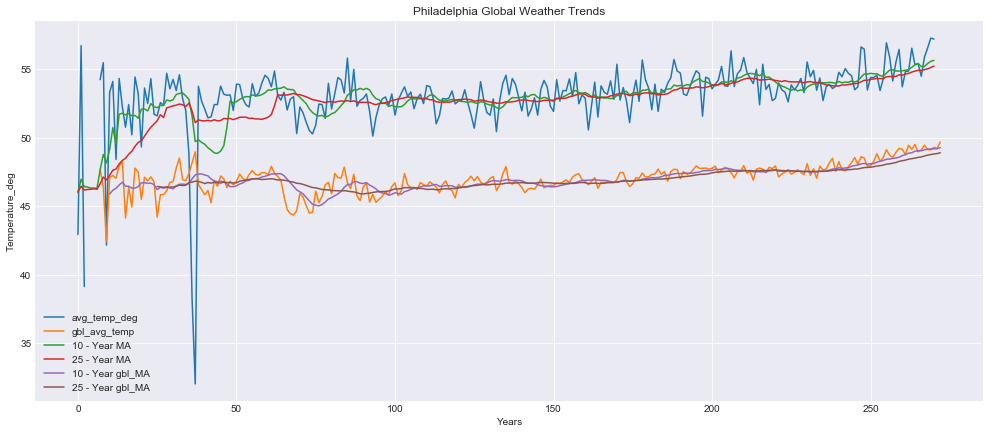

In [26]:
phila_gwt_df[['avg_temp_deg','gbl_avg_temp','10 - Year MA','25 - Year MA','10 - Year gbl_MA','25 - Year gbl_MA']].plot(subplots=False,figsize=(17,7))

# Setting my labels and title
plt.xlabel('Years')
plt.ylabel('Temperature_deg')
plt.title('Philadelphia Global Weather Trends')

Ahhh, Philadelphia, my city of residence, let's see how you stack up against the rest of the cities and global data.  Well, to start, visually I 
can see that the average temperature for Philadelphia is higher(hotter) than that of the global average temperature data and this has been 
consistent over the timespan of the dataset, minus a sudden drop in temperature around the 40 year mark of the dataset. (Remember the data set
years column starts at 1743 and ends at 2015).  

This looks interesting... The changes in average temperature for Philadelphia over time seems to hover around the 5 degree mark, whereas the 
variance in change in temperature for the global dataset seems to shrink as time progresses. With respect to the moving averages for either 
Philadelphia or the global data, we can clearly see the direct correlation. We can also see the variance between Philadelphia's moving averages
vs. the global data's moving averages remains pretty consistent over the two hundered plus year timespan. 

This visualization, as well, over the last few hundred years seems to support the idea of an slowly but surely increasing(hotter) global average 
temperature. 

Were my assumptions about Philadelphia supported or disputed by the above plot?  I'd have to say, a little bit of both. I honestly thought that 
Philadelphia's average temperature would be higher than Barcelona's given it's slightly more southern geographical location but I was wrong. 
Barcelona's average temperature is about 10 degrees higher(hotter) than Philadelphia's.

# My exploration into correlated coefficients:

- Now that I've plotted some of my baseline analyses of the datasets, let's go ahead and plot my deeper exploration of the data by finding the 
correlated coefficients for my selected cities and global dataset. But first, I'll take a quick glance at the variance in average temperature change
per year for my selected cities and global dataset. 

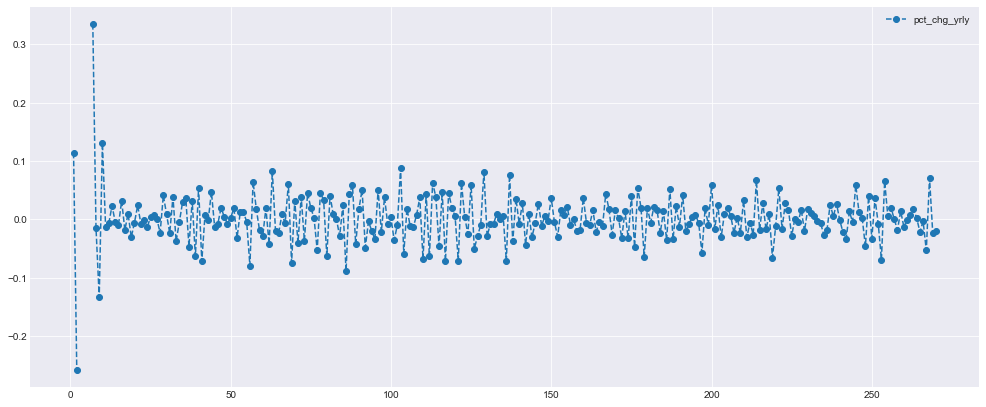

In [27]:
# Plotting the variance between temperature change yearly for my Amsterdam, Netherlands dataset
amster_pct_chg_df['pct_chg_yrly'].plot(figsize=(17,7),legend=True,linestyle='--',marker='o')

# Setting my xlabel, ylabel and title
plt.xlabel = ('Year')
plt.ylabel = ('Temperature_deg')
plt.title = ("Amsterdam's Average Percentage Change in Temperature")

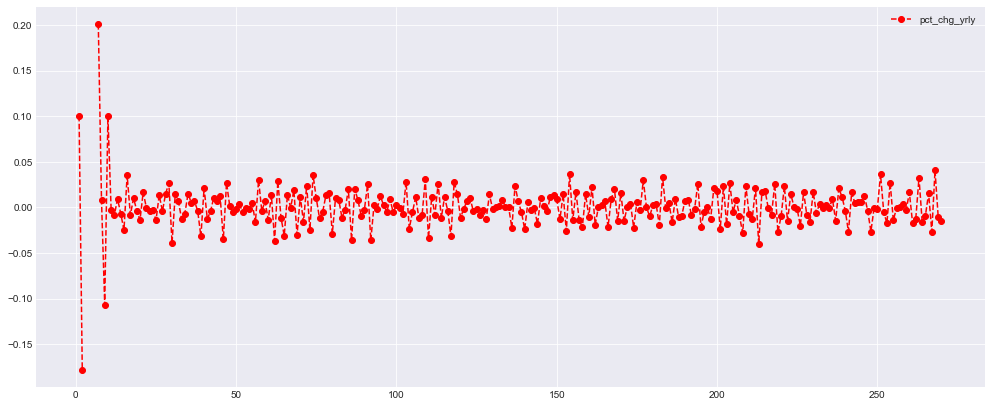

In [28]:
# Plotting the variance between temperature change yearly for my Barcelona, Spain dataset
barca_pct_chg_df['pct_chg_yrly'].plot(figsize=(17,7),legend=True,color='r',linestyle='--',marker='o')

# Setting my xlabel, ylabel and title
plt.xlabel = ('Year')
plt.ylabel = ('Temperature_deg')
plt.title = ("Barcelona's Average Percentage Change in Temperature")

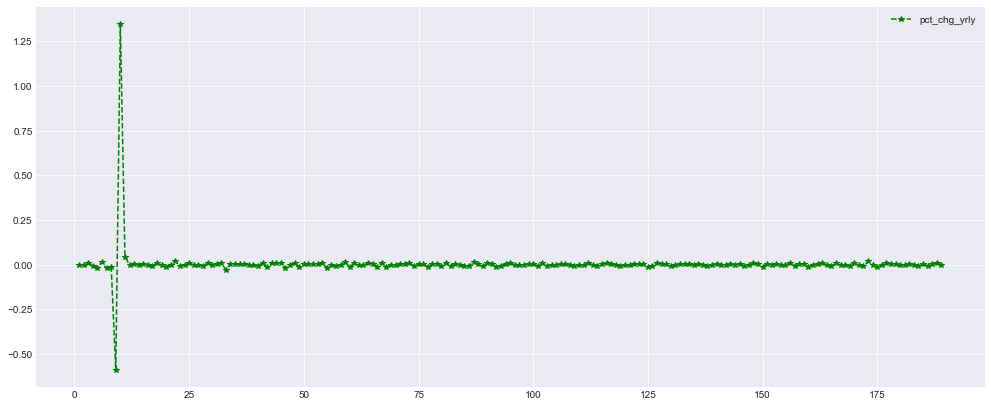

In [29]:
# Plotting the variance between temperature change yearly for my Kingston, Jamaica dataset
king_pct_chg_df['pct_chg_yrly'].plot(figsize=(17,7),color='g',legend=True,linestyle='--',marker='*')

# Setting my xlabel, ylabel and title
plt.xlabel = ('Year')
plt.ylabel = ('Temperature_deg')
plt.title = ("Kingston's Average Percentage Change in Temperature")

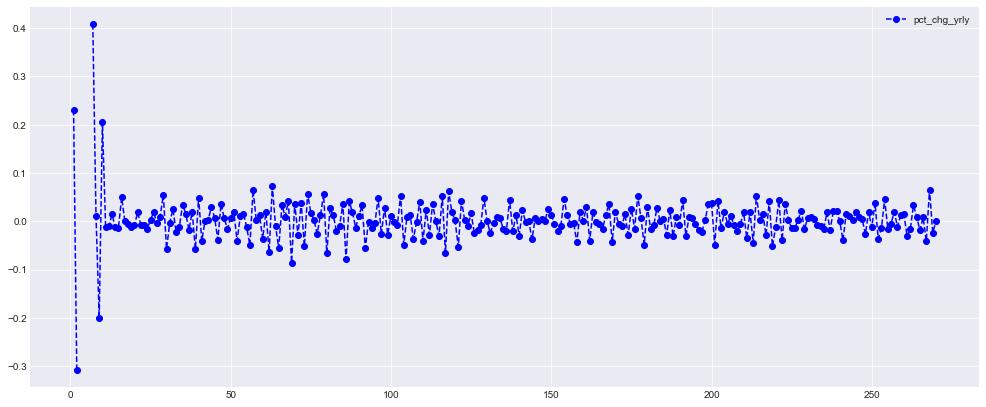

In [30]:
# Plotting the variance between temperature change yearly for my Milan, Italy dataset
mila_pct_chg_df['pct_chg_yrly'].plot(figsize=(17,7),color='b',legend=True,linestyle='--',marker='o')

# Setting my xlabel, ylabel and title
plt.xlabel = ('Year')
plt.ylabel = ('Temperature_deg')
plt.title = ("Milan's Average Percentage Change in Temperature")

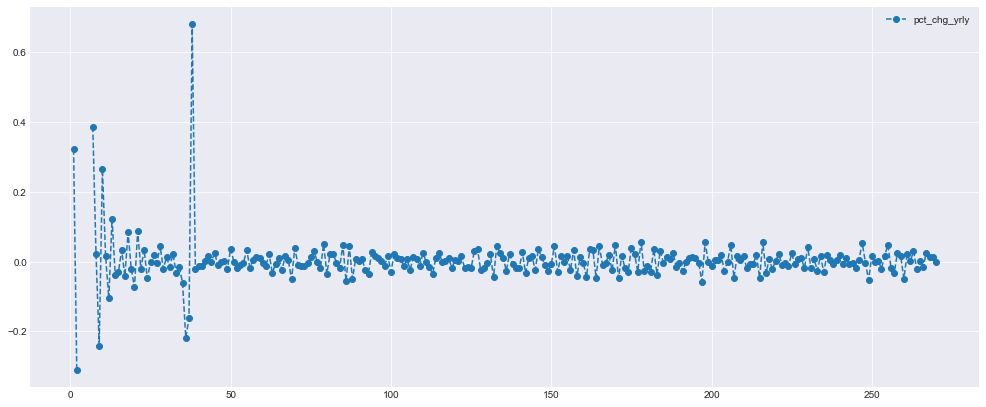

In [31]:
# Plotting the variance between temperature change yearly for my Philadelphia, Pennsylvania dataset
phila_pct_chg_df['pct_chg_yrly'].plot(figsize=(17,7),legend=True,linestyle='--',marker='o')

# Setting my xlabel, ylabel and title
plt.xlabel = ('Year')
plt.ylabel = ('Temperature_deg')
plt.title = ("Philadelphia's Average Percentage Change in Temperature")

I mentioned earlier that I would compare the average percentage change in temperature of two cities to check how correlated they are, and I will. 
However, just to test my theory, let's first see a city compared to itself; theoretically, this should produce a linear visualization because I'm 
comparing data to itself. 

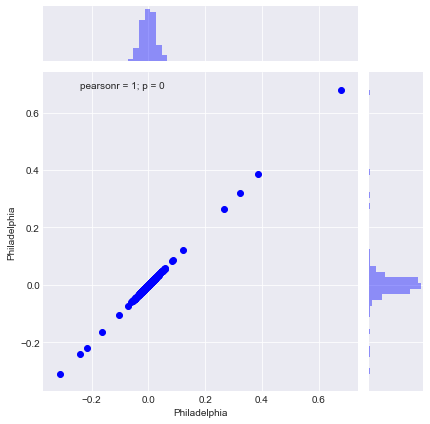

In [32]:
# Comparing Philadelphia to itself should show a perfectly linear relationship
sns.jointplot('Philadelphia','Philadelphia',comp_pct_chg_df,kind='scatter',color='blue')

Great! It does, so my assumption was correct. The correlation coeffecient, or Pearsonr value is equal to 1, suggesting there is a 100% linear relationship between the data. Let's tackle comparing multiple cities together or cities vs. the global data. 

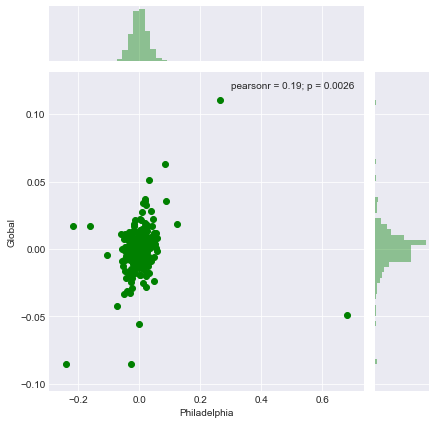

In [33]:
# Comparing Philadelphia's average percentage change in temperature to that of the global dataset's
sns.jointplot('Philadelphia','Global',comp_pct_chg_df,kind='scatter',color='green')

Here the Pearsonr or correlation coefficient is .19 or almost 20% when comparing Philadelphia's average change in temperature to the global dataset.

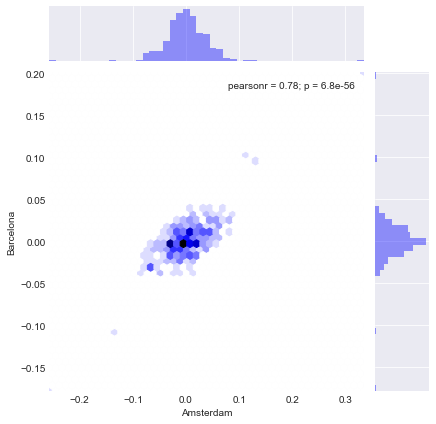

In [34]:
# Comparing Amsterdam's average percentage change in temperature to that of Barcelona's
sns.jointplot('Amsterdam','Barcelona',comp_pct_chg_df,kind='hex',color='blue')

Interesting, my plot shows the Pearsonr coefficient to be just over 75%. This makes sense that Amsterdam's and Barcelona's average percentage change
in temperature is almost linear because they are geographically not too far apart. Now that I've compared multiple cities, I'd like to compare all
my data to see if there is a correlation that exists between any combination of pairings.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of cities in my city_list. I can use 
sns.pairplot() to automatically create this plot.

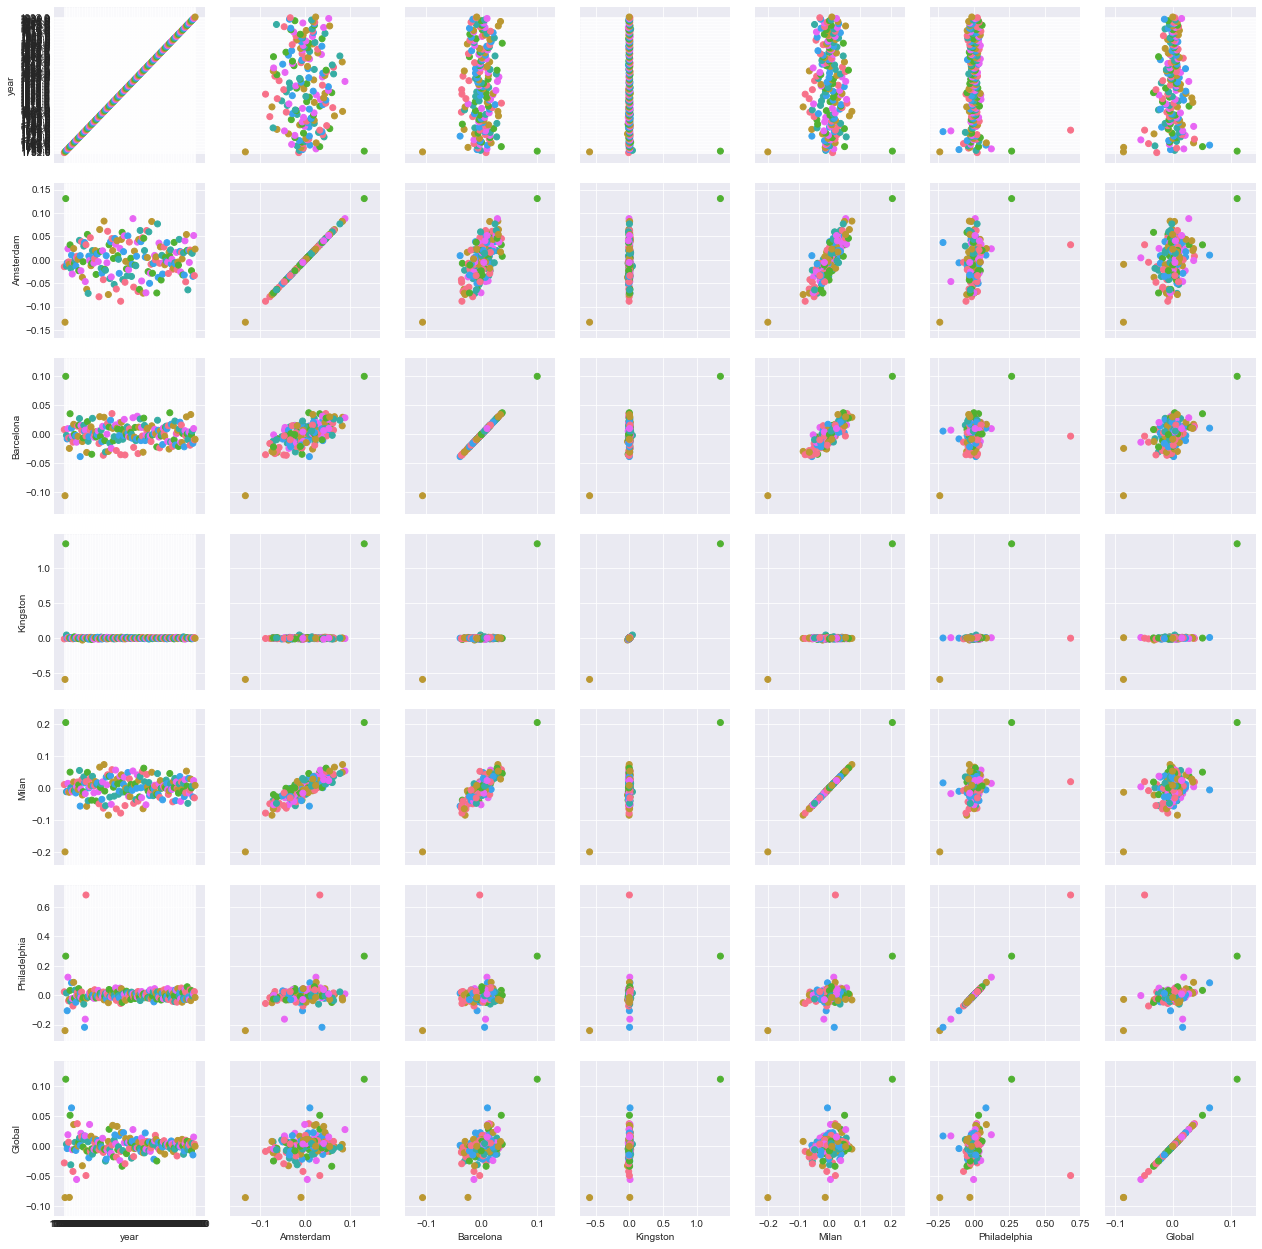

In [69]:
# Setting my seaborn color palette first
current_palette = sns.color_palette()

# Creating a comparison plot (.pairplot()) of all my cities' and global data's average percent change in temperature
comp_pct_temp_chg = sns.PairGrid(comp_pct_chg_df.dropna())

comp_pct_temp_chg = comp_pct_temp_chg.map(plt.scatter,color=current_palette)


Cool! Now we can see every combination comparison between city and city or city and global data averages for change in temperature. 

# Conclusion

That was a pretty cool exploration of city data vs. global averages in temperature.  I wanted to explore the datasets for the following things: 

1.) At first glance, are there any trends that you notice visually within the data?

2.) Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?

3.) How do the changes in your city's temperatures over time compare to the changes in the global average? What about the moving average?

4.) What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

5.) Does my analysis and exploration of the supporting datasets support or dispute my assumptions when comparing cities to one another?

6.) What's the correlation coefficient for your selected cities?

Surprisingly I was able to make a lot of assumptions about the datasets based on the visualizations, which I didnt expect, but was secretly hoping for. In a sense, it validates that without actually knowing specific data points, I could could still assess the data correctly

Based on our analysis of data, I was able to determine that Philadelphia's average temperature yearly is warmer than that of the global average temperature. Another interesting find was how the change in temperature yearly over time was pretty consistent between cities and the global data. I wasn't expecting to see that. To that point, my investigation of the datasets does show a slight steady increase in average global temperature over time which would indicate that the world is getting warmer.

Lastly, for me, the most interesting evaluation of the data were the Pearsonr or correlation coefficients between datassets.  It was really intruiging to see the relationship between city data and global data one v. one, but also using Seaborn's .PairGrid() function where all possible data compbinations would be analyzed.  This would have been super cool and fun to explore if I were a bit more versed in Python, to really utilize the different plotting functions like .map_diag(),.map_upper(),and .map_lower() to express and convey key relationships. Not for nothing, I tried to explore this, but to no avail... I spent a lot of time trying to get the code to work but I kept getting a User Warning: the following kwargs were not used: 'label' and 'colors'.

That's ok though. I hope by the end of my DAND, I'll have amassed the skillset to visualize anything my mind can come up with. 